# <center> <font color='blue'> Unidad 3: Introducción a Bibliotecas de Visualización  </font> </center>

## <font color='blue'> Visualizando incertidumbres  </font>

---

Para cualquier medición científica, una descripción adecuada de las incertidumbres es casi tan importante, 
si no más, como la información precisa del número mismo. 
Por ejemplo, imagine que estoy utilizando algunas observaciones astrofísicas para estimar la constante de Hubble, 
la medida local de la tasa de expansión del Universo. Sé que la literatura actual sugiere un valor de alrededor de 
$70 \ {\rm (km/s)/Mpc}$, y yo mido un valor de $74 \ {\rm (km/s)/Mpc}$ con mi método. 

¿Son consistentes los valores? La única respuesta correcta, dada esta información, es ésta: no hay forma de saberlo.

Supongamos que aumento esta información con incertidumbres reportadas: la literatura actual sugiere un 
valor de $70 \pm 2.5 \ {\rm (km/s)/Mpc}$, y mi método ha medido un valor de $74 \pm 5 \ {\rm (km/s)/Mpc}$. 
Ahora bien, ¿son consistentes los valores? Ésta es una pregunta que puede responderse cuantitativamente.

En la visualización de datos y resultados, mostrar estos errores de manera efectiva puede hacer que 
un gráfico transmita información mucho más completa.

### Barras de error básicas: función `plt.errorbar()`

Una forma estándar de visualizar incertidumbres es utilizar una barra de error. 
Se puede crear una barra de error básica con una única llamada a la función Matplotlib `plt.errorbar()`.

La función `plt.errorbar()` se utiliza para trazar puntos de datos junto con barras de error que 
representan la incertidumbre o el error asociado con cada punto de datos.

#### Sintaxis básica:

```python
import matplotlib.pyplot as plt

# Inlucir el error
plt.errorbar(x, y, yerr=None, xerr=None, fmt='', ecolor=None, elinewidth=None, capsize=None, capthick=None, barsabove=False)

```

#### Parámetros principales:

- **x**: Coordenadas x de los puntos de datos.
- **y**: Coordenadas y de los puntos de datos.
- **yerr**: Longitudes de las barras de error en la dirección y. Puede ser un escalar o un array de la misma longitud que y.
- **xerr**: Longitudes de las barras de error en la dirección x. Puede ser un escalar o un array de la misma longitud que x.

#### Otros parámetros opcionales:

- **fmt**: Especifica el formato de línea y marcador para los puntos de datos. Por ejemplo, 'o' para puntos circulares, '-' para línea sólida, etc.
- **ecolor**: Color de las barras de error.
- **elinewidth**: Grosor de las barras de error.
- **capsize**: Tamaño de las tapas de las barras de error.
- **capthick**: Grosor de las tapas de las barras de error.
- **barsabove**: Si es True, las barras de error se dibujan por encima de los puntos de datos.


### <font color='red'> Ejemplo: </font> Básico

---


In [2]:
import matplotlib.pyplot as plt
import numpy as np

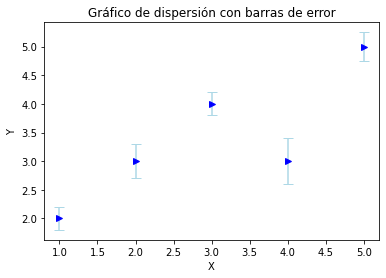

In [11]:
# Datos
x = [1, 2, 3, 4, 5]
y = [2, 3, 4, 3, 5]
# incertidumbre mediciones de y
delta_y = [0.2, 0.3, 0.2, 0.4, 0.25] 

# Gráfico con barras de error
plt.errorbar(x, y, yerr=delta_y, fmt='>b', ecolor='lightblue', capsize=5)

# Etiquetas y título
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de dispersión con barras de error')

# Mostrar el gráfico
plt.show()


### <font color='red'> Ejemplo: </font> Experimento de física de laboratorio

---

Supongamos que estás realizando un experimento para medir la relación entre la fuerza aplicada a un resorte y 
la longitud resultante del resorte. Durante el experimento, tomas mediciones de la fuerza aplicada y la longitud resultante del resorte, 
junto con las incertidumbres asociadas a estas mediciones.

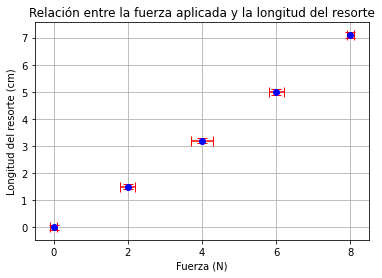

In [13]:
# Datos experimentales (fuerza y longitud del resorte)
fuerza = np.array([0, 2, 4, 6, 8])  # Fuerza aplicada (N)
longitud = np.array([0, 1.5, 3.2, 5.0, 7.1])  # Longitud resultante del resorte (cm)

# Incertidumbres asociadas a las mediciones
incert_fuerza = np.array([0.1, 0.2, 0.3, 0.2, 0.1])  # Incertidumbre en la fuerza (N)
incert_longitud = np.array([0.1, 0.1, 0.1, 0.1, 0.1])  # Incertidumbre en la longitud (cm)

# Gráfico de dispersión con barras de error
plt.errorbar(fuerza, longitud, xerr=incert_fuerza, yerr=incert_longitud, fmt='o', color='blue', ecolor='red', 
             capsize=5)

# Etiquetas y título
plt.xlabel('Fuerza (N)')
plt.ylabel('Longitud del resorte (cm)')
plt.title('Relación entre la fuerza aplicada y la longitud del resorte')

# Mostrar el gráfico
plt.grid(True)
plt.show()


### <font color='red'> Ejemplo: </font> Personalización avanzada

---


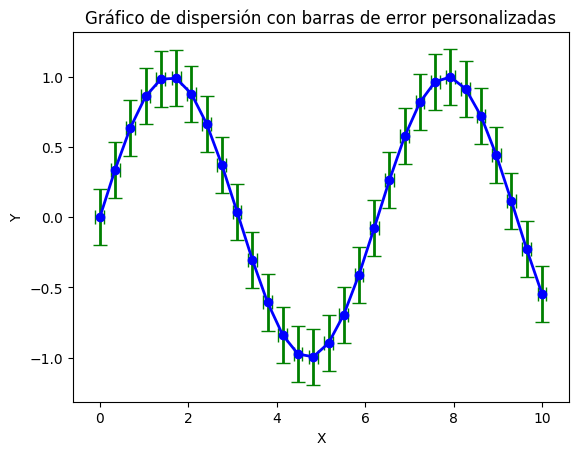

In [17]:
# Datos
x = np.linspace(0, 10, 30)
y = np.sin(x)
xerr = 0.1
yerr = 0.2

# Gráfico con barras de error personalizadas
plt.errorbar(x, y, xerr=xerr, yerr=yerr, fmt='o', color='blue', ecolor='green', linestyle='-', linewidth=2, 
             capsize=5)

# Etiquetas y título
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de dispersión con barras de error personalizadas')

# Mostrar el gráfico
plt.show()


## <font color='purple'> Errores continuos </font>

En algunas situaciones es deseable mostrar barras de error en cantidades continuas. Aunque Matplotlib no tiene una rutina de conveniencia incorporada para este tipo de aplicación, es relativamente fácil combinar primitivas 
como `plt.plot` y `plt.fill_between` para obtener un resultado útil.


La función `plt.fill_between()` en **Matplotlib** se utiliza para llenar el área entre dos curvas 
(o entre una curva y un valor constante) en un gráfico. Esto es útil para resaltar regiones específicas de interés en el gráfico.

#### Sintaxis básica:

```python
import matplotlib.pyplot as plt

plt.fill_between(x, y1, y2=0, color=None, alpha=None, label=None, ... )

```


#### Parámetros principales:

- **x**: Coordenadas x de los puntos de datos.
- **y1**: Coordenadas y de la primera curva (inferior).
- **y2**: Coordenadas y de la segunda curva (superior). Si se omite, se asume un valor constante de 0.


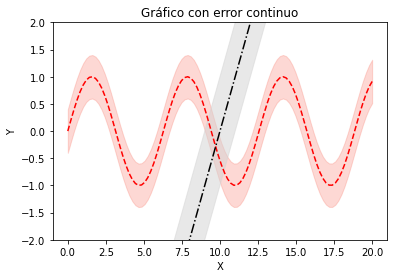

In [33]:
# Datos con la función seno
x = np.linspace(0, 20, 100)
y = np.sin(x)

# Datos funcin lineal
y_1 = x - 10

# Gráfico con barras de error personalizadas
plt.plot(x,y, '--r')
plt.plot(x,y_1, '-.k')
plt.fill_between(x, y - 0.4, y + 0.4, color='salmon', alpha=0.3)
plt.fill_between(x, y_1 - 1, y_1 + 1, color='lightgray', alpha=0.5)
plt.ylim(-2,2)

# Etiquetas y título
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico con error continuo')
#plt.legend()

# Mostrar el gráfico
plt.show()


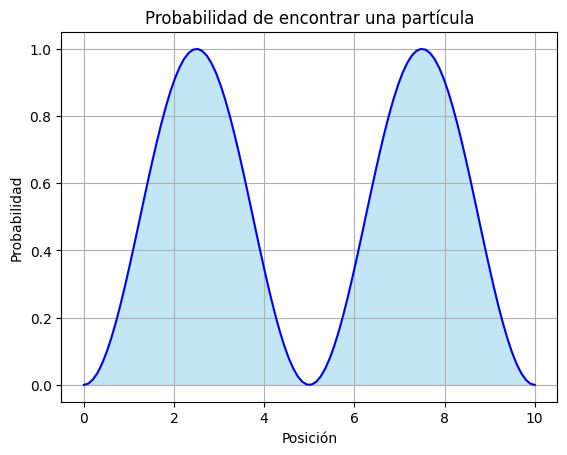

In [29]:
# Definir la función de onda (modulada)
def wave_function(x):
    return np.sin(2 * np.pi * x / 10)**2

# Datos
x = np.linspace(0, 10, 100)
y = wave_function(x)

# Llenar el área bajo la curva para indicar la probabilidad
plt.fill_between(x, y, color='skyblue', alpha=0.5)

# Gráfico de la función de onda cuadrada
plt.plot(x, y, color='blue')

# Etiquetas y título
plt.xlabel('Posición')
plt.ylabel('Probabilidad')
plt.title('Probabilidad de encontrar una partícula')

# Mostrar el gráfico
plt.grid(True)
plt.show()
